Task 1

In [1]:
import pandas as pd
gene_expression_df = pd.read_excel('/content/Gene_Expression_Data.xlsx')
gene_inforamation_df = pd.read_csv('/content/Gene_Information.csv')
sample_info_df = pd.read_csv('/content/Sample_Information.tsv', sep='\t')
print(gene_expression_df.head())
print(gene_inforamation_df.head())
print(sample_info_df.head())

       Probe_ID   GSM820516   GSM820517   GSM820518   GSM820519   GSM820520  \
0  ILMN_1343291  66665.3800  69404.6700  64128.0700  68943.9700  67827.2200   
1  ILMN_1343295  22040.1100  13046.3400  38678.9600  16641.8900  33719.8900   
2  ILMN_1651199    226.6081    205.4483    217.2475    229.0451    226.3029   
3  ILMN_1651209    278.5710    253.7044    211.8002    278.0423    259.8059   
4  ILMN_1651210    195.4914    195.9835    175.3356    193.9065    229.5674   

    GSM820521   GSM820522   GSM820523   GSM820524   GSM820525   GSM820526  \
0  71775.3000  62245.5900  69713.7000  69509.2700  68244.5900  65427.4700   
1  18933.2900  26170.0400   9906.9130  17166.5200  12428.9500  25297.5700   
2    203.8710    213.4431    210.4129    229.5394    212.7384    226.1345   
3    265.1900    321.2587    273.4458    253.6032    310.1582    275.0126   
4    164.0632    244.6696    190.9813    188.1039    199.3084    220.6229   

    GSM820527   GSM820528   GSM820529   GSM820530   GSM820531 

In [2]:
#b
#changing the sample names from the “Gene_Expression_Data.xlsx”,
#based upon the phenotype presented in “Sample_Information.tsv”
sample_name_mapping = {}
phenotype_counts = {}

for index, row in sample_info_df.iterrows():
    group = row['group']
    patient = row['patient']

    base_name = f"{group}_{patient}"

    if base_name in phenotype_counts:
        phenotype_counts[base_name] += 1
        new_name = f"{base_name}_{phenotype_counts[base_name]}"
    else:
        phenotype_counts[base_name] = 1
        new_name = base_name


    sample_name_mapping[index] = new_name

gene_expression_df.rename(columns=sample_name_mapping, inplace=True)

gene_expression_df.head()

,Probe_ID,tumor_patient: 1,normal_patient: 1,tumor_patient: 2,normal_patient: 2,tumor_patient: 3,normal_patient: 3,tumor_patient: 4,normal_patient: 4,tumor_patient: 5,normal_patient: 5,tumor_patient: 6,normal_patient: 6,tumor_patient: 7,normal_patient: 7,tumor_patient: 8,normal_patient: 8,tumor_patient: 9,normal_patient: 9
0,ILMN_1343291,66665.3800,69404.6700,64128.0700,68943.9700,67827.2200,71775.3000,62245.5900,69713.7000,69509.2700,68244.5900,65427.4700,68436.5200,57608.6700,69959.7700,69509.2700,70063.7700,69647.1700,70332.3400
1,ILMN_1343295,22040.1100,13046.3400,38678.9600,16641.8900,33719.8900,18933.2900,26170.0400,9906.9130,17166.5200,12428.9500,25297.5700,17535.6000,19749.1400,17854.2900,43670.6800,22849.0800,23725.6600,28747.0100
2,ILMN_1651199,226.6081,205.4483,217.2475,229.0451,226.3029,203.8710,213.4431,210.4129,229.5394,212.7384,226.1345,232.2437,208.7316,229.2948,214.4033,216.6758,195.6539,252.1502
3,ILMN_1651209,278.5710,253.7044,211.8002,278.0423,259.8059,265.1900,321.2587,273.4458,253.6032,310.1582,275.0126,274.9519,250.6420,255.8540,219.5752,292.4965,253.3126,237.9844
4,ILMN_1651210,195.4914,195.9835,175.3356,193.9065,229.5674,164.0632,244.6696,190.9813,188.1039,199.3084,220.6229,213.3975,194.7746,173.7073,185.3380,174.6898,195.3534,191.9382


In [3]:
#c
#Splitting the merged data from part b, into to 2 parts, based upon their labeled phenotype (ie. tumor or normal)
tumor_df = gene_expression_df.loc[:, (gene_expression_df.columns.str.startswith('tumor') | (gene_expression_df.columns == 'Probe_ID'))]
normal_df = gene_expression_df.loc[:, (gene_expression_df.columns.str.startswith('normal') | (gene_expression_df.columns == 'Probe_ID'))]
tumor_df.head(), normal_df.head()

(       Probe_ID  tumor_patient: 1  tumor_patient: 2  tumor_patient: 3  \
 0  ILMN_1343291        66665.3800        64128.0700        67827.2200   
 1  ILMN_1343295        22040.1100        38678.9600        33719.8900   
 2  ILMN_1651199          226.6081          217.2475          226.3029   
 3  ILMN_1651209          278.5710          211.8002          259.8059   
 4  ILMN_1651210          195.4914          175.3356          229.5674   
 
    tumor_patient: 4  tumor_patient: 5  tumor_patient: 6  tumor_patient: 7  \
 0        62245.5900        69509.2700        65427.4700        57608.6700   
 1        26170.0400        17166.5200        25297.5700        19749.1400   
 2          213.4431          229.5394          226.1345          208.7316   
 3          321.2587          253.6032          275.0126          250.6420   
 4          244.6696          188.1039          220.6229          194.7746   
 
    tumor_patient: 8  tumor_patient: 9  
 0        69509.2700        69647.1700  
 1

In [4]:
#d
#Compute the average expression for each probe from the 2 data sets from part c
tumor_avg_expression = tumor_df.copy()
tumor_avg_expression['Average_Expression'] = tumor_df.drop(columns='Probe_ID').mean(axis=1)

normal_avg_expression = normal_df.copy()
normal_avg_expression['Average_Expression'] = normal_df.drop(columns='Probe_ID').mean(axis=1)

tumor_avg_expression[['Probe_ID', 'Average_Expression']].head(), normal_avg_expression[['Probe_ID', 'Average_Expression']].head()


(       Probe_ID  Average_Expression
 0  ILMN_1343291        65840.901111
 1  ILMN_1343295        27802.063333
 2  ILMN_1651199          217.562700
 3  ILMN_1651209          258.175711
 4  ILMN_1651210          203.250756,
        Probe_ID  Average_Expression
 0  ILMN_1343291        69652.736667
 1  ILMN_1343295        17549.262556
 2  ILMN_1651199          221.320022
 3  ILMN_1651209          271.314167
 4  ILMN_1651210          188.663967)

In [5]:
#e
#Determine the fold change for each probe between the two groups ((Tumour – Control) / Control)
merged_avg_expression = pd.merge(tumor_avg_expression[['Probe_ID', 'Average_Expression']],
                                 normal_avg_expression[['Probe_ID', 'Average_Expression']],
                                 on='Probe_ID',
                                 suffixes=('_Tumor', '_Control'))

merged_avg_expression['Fold_Change'] = (merged_avg_expression['Average_Expression_Tumor'] - merged_avg_expression['Average_Expression_Control']) / merged_avg_expression['Average_Expression_Control']

merged_avg_expression



,Probe_ID,Average_Expression_Tumor,Average_Expression_Control,Fold_Change
0,ILMN_1343291,65840.901111,69652.736667,-0.054726
1,ILMN_1343295,27802.063333,17549.262556,0.584230
2,ILMN_1651199,217.562700,221.320022,-0.016977
3,ILMN_1651209,258.175711,271.314167,-0.048425
4,ILMN_1651210,203.250756,188.663967,0.077316
...,...,...,...,...
48798,ILMN_2415911,1061.050144,792.658411,0.338597
48799,ILMN_2415926,2400.563667,1354.958044,0.771689
48800,ILMN_2415949,2126.544889,1684.671389,0.262291
48801,ILMN_2415979,3160.949222,5400.365889,-0.414679


In [6]:
#f
#Using the data from part e and “Gene_Information.csv” to identify all genes fold change magnitude (absolute value) was greater than 5
merged_gene_info = pd.merge(merged_avg_expression, gene_inforamation_df, on='Probe_ID')

filtered_genes = merged_gene_info[abs(merged_gene_info['Fold_Change']) > 5]

filtered_genes.head()


,Probe_ID,Average_Expression_Tumor,Average_Expression_Control,Fold_Change,Symbol,Entrez_Gene_ID,Chromosome,Cytoband
46,ILMN_1651354,5569.856956,863.087133,5.453412,SPP1,6696.0,4,4q22.1b
1077,ILMN_1655915,4949.759489,535.792700,8.238199,MMP11,4320.0,22,22q11.23a
3481,ILMN_1666733,5967.483111,519.832022,10.479637,IL8,3576.0,4,4q13.3d
3949,ILMN_1669046,10719.899111,353.736022,29.304799,FOXQ1,94234.0,6,6p25.3a
6505,ILMN_1681260,1787.026600,238.753656,6.484814,LOC643272,643272.0,3,NaN


In [7]:
import numpy as np
#g
# Determine if the gene was higher expressed in "Normal" or "Tumor" samples
filtered_genes['Higher_Expressed_In'] = np.where(
    filtered_genes['Average_Expression_Tumor'] > filtered_genes['Average_Expression_Control'],
    'Tumor',
    'Normal'
)

filtered_genes

<ipython-input-7-0ed4065d5c32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genes['Higher_Expressed_In'] = np.where(


,Probe_ID,Average_Expression_Tumor,Average_Expression_Control,Fold_Change,Symbol,Entrez_Gene_ID,Chromosome,Cytoband,Higher_Expressed_In
46,ILMN_1651354,5569.856956,863.087133,5.453412,SPP1,6696.0,4,4q22.1b,Tumor
1077,ILMN_1655915,4949.759489,535.792700,8.238199,MMP11,4320.0,22,22q11.23a,Tumor
3481,ILMN_1666733,5967.483111,519.832022,10.479637,IL8,3576.0,4,4q13.3d,Tumor
3949,ILMN_1669046,10719.899111,353.736022,29.304799,FOXQ1,94234.0,6,6p25.3a,Tumor
6505,ILMN_1681260,1787.026600,238.753656,6.484814,LOC643272,643272.0,3,NaN,Tumor
6537,ILMN_1681462,9065.138122,203.389556,43.570323,REG1B,5968.0,2,2p12e,Tumor
7309,ILMN_1685403,7246.699000,274.965344,25.354954,MMP7,4316.0,11,11q22.2a,Tumor
7656,ILMN_1687319,1499.093578,195.829433,6.655098,SLCO1B3,28234.0,12,12p12.2a,Tumor
8620,ILMN_1692223,47298.018889,7577.475522,5.241923,LCN2,3934.0,9,9q34.11b,Tumor
9311,ILMN_1695924,3695.053567,394.158911,8.374528,KLK11,11012.0,19,19q13.33d,Tumor


Task 2

Task 2a.

In [8]:
import numpy as np
#Getting the statistics of the fold change
mean_fold_change = np.mean(filtered_genes['Fold_Change'])
median_fold_change = np.median(filtered_genes['Fold_Change'])
std_fold_change = np.std(filtered_genes['Fold_Change'])

print("Mean Fold Change:", mean_fold_change)
print("Median Fold Change:", median_fold_change)
print("Standard Deviation of Fold Change:", std_fold_change)

Mean Fold Change: 12.758509195803645
Median Fold Change: 7.9167097888996905
Standard Deviation of Fold Change: 10.798974152163087


In [9]:
np.random.seed(42)
# Getting the symbol with the highest fold change and its value
max_fold_change_row = filtered_genes.loc[filtered_genes['Fold_Change'].idxmax()]
max_fold_change_symbol = max_fold_change_row['Symbol']
max_fold_change_value = max_fold_change_row['Fold_Change']

# Getting the symbol with the lowest fold change and its value
min_fold_change_row = filtered_genes.loc[filtered_genes['Fold_Change'].idxmin()]
min_fold_change_symbol = min_fold_change_row['Symbol']
min_fold_change_value = min_fold_change_row['Fold_Change']

print("The symbol with the highest fold change is:", max_fold_change_symbol, "with a fold change of:", max_fold_change_value)
print("The symbol with the lowest fold change is:", min_fold_change_symbol, "with a fold change of:", min_fold_change_value)


The symbol with the highest fold change is: REG1B with a fold change of: 43.57032268673252
The symbol with the lowest fold change is: KRT80 with a fold change of: 5.0875374379579235


In [10]:
# Getting the top 5 highest genes and what their Cytoband is
top_5_genes = filtered_genes.reindex(filtered_genes['Fold_Change'].abs().sort_values(ascending=False).index).head(5)

# Display the top 5 genes with their chromosome information and Cytoband code
top_5_genes_info = top_5_genes[['Symbol', 'Chromosome', 'Fold_Change', 'Cytoband']]
print(top_5_genes_info)

      Symbol Chromosome  Fold_Change  Cytoband
6537   REG1B          2    43.570323     2p12e
26614  REG1A          2    43.215328     2p12e
44270   MMP7         11    37.458457  11q22.2a
47796  REG3A          2    36.953867     2p12e
21301   TCN1         11    30.855554  11q12.1d


In [11]:
# Group by chromosome and calculate mean fold change per chromosome
chromosome_mean_fold_change = filtered_genes.groupby('Chromosome')['Fold_Change'].agg(np.mean)
# Group by chromosome and calculate mean average expression per chromosome
chromosome_mean_expression = filtered_genes.groupby('Chromosome')['Average_Expression_Tumor'].agg(np.mean)
#Group by chromosome and calculate mean average expression control per chromosome
chromosome_mean_expression_control = filtered_genes.groupby('Chromosome')['Average_Expression_Control'].agg(np.mean)
#Putting all these into a dataframe includinng the chromsome
chromosome_stats = pd.DataFrame({
    'Mean_Fold_Change': chromosome_mean_fold_change,
    'Mean_Expression': chromosome_mean_expression,
    'Mean_Expression_Control': chromosome_mean_expression_control
})
print(chromosome_stats.sort_values(by='Mean_Fold_Change', ascending=False))

            Mean_Fold_Change  Mean_Expression  Mean_Expression_Control
Chromosome                                                            
2                  41.246506      8939.658689               212.014970
15                 23.549032      7584.119822               297.531067
11                 22.057132      5918.610091               277.097807
6                  18.388628      7240.052839               398.775700
X                  14.945559      3804.232000               238.576267
3                   9.284739      4336.424356               382.502506
4                   8.930050      8027.851170               813.679133
20                  8.545769      4997.911304               484.019144
22                  8.238199      4949.759489               535.792700
16                  8.112474      5289.464222               598.791950
1                   7.955412      6305.649456               759.571207
8                   7.803264      4117.287381               510.864481
9     

<ipython-input-11-6b5432bea68f>:2: FutureWarning: The provided callable <function mean at 0x7b52a26dc280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  chromosome_mean_fold_change = filtered_genes.groupby('Chromosome')['Fold_Change'].agg(np.mean)
<ipython-input-11-6b5432bea68f>:4: FutureWarning: The provided callable <function mean at 0x7b52a26dc280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  chromosome_mean_expression = filtered_genes.groupby('Chromosome')['Average_Expression_Tumor'].agg(np.mean)
<ipython-input-11-6b5432bea68f>:6: FutureWarning: The provided callable <function mean at 0x7b52a26dc280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current b

In [12]:
#Displaying the chromosomes with the highest mean fold change, expression, and control
chromosome_stats.idxmax()

,0
Mean_Fold_Change,2
Mean_Expression,9
Mean_Expression_Control,9


Task 2b

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

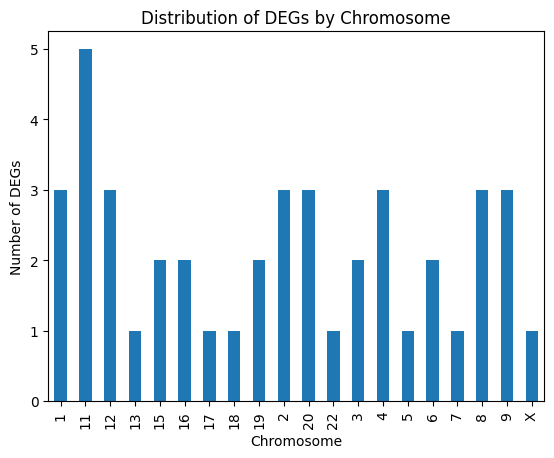

In [13]:
#Histogram showing the distribution of the number of differentially expressed genes (DEGs) by chromosome
import matplotlib.pyplot as plt

genes_hist = filtered_genes['Chromosome'].value_counts().sort_index()
genes_hist.plot(kind='bar')
plt.xlabel('Chromosome')
plt.ylabel('Number of DEGs')
plt.title('Distribution of DEGs by Chromosome')
plt

Task 2C

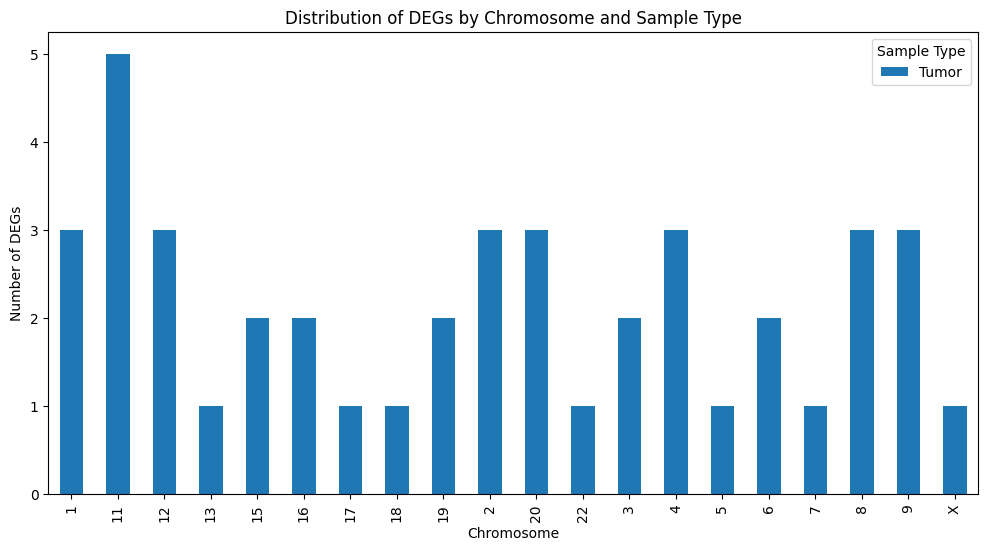

In [14]:
import matplotlib.pyplot as plt

deg_by_chromosome_sample = filtered_genes.groupby(['Chromosome', 'Higher_Expressed_In'])['Probe_ID'].count().unstack()

# Histogram
deg_by_chromosome_sample.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Chromosome')
plt.ylabel('Number of DEGs')
plt.title('Distribution of DEGs by Chromosome and Sample Type')
plt.legend(title='Sample Type')
plt.show()


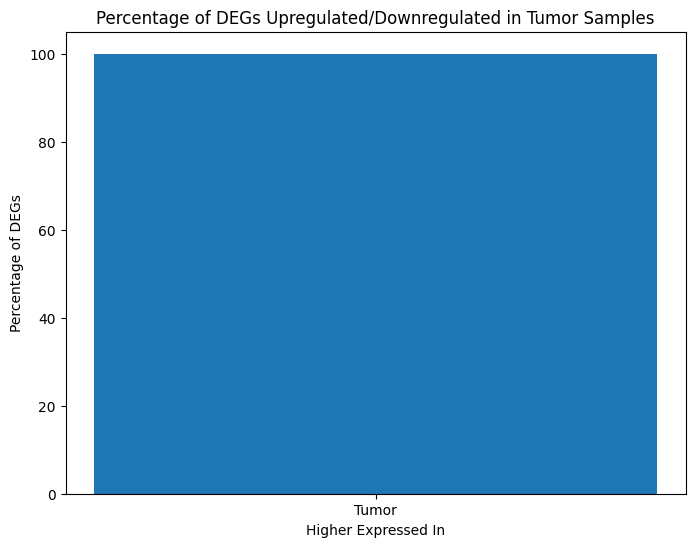

In [15]:
# Calculate the counts of DEGs upregulated and downregulated in Tumor samples
deg_counts = filtered_genes['Higher_Expressed_In'].value_counts()

# Calculate the percentages
deg_percentages = (deg_counts / deg_counts.sum()) * 100

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(deg_percentages.index, deg_percentages.values)
plt.xlabel('Higher Expressed In')
plt.ylabel('Percentage of DEGs')
plt.title('Percentage of DEGs Upregulated/Downregulated in Tumor Samples')
plt.show()


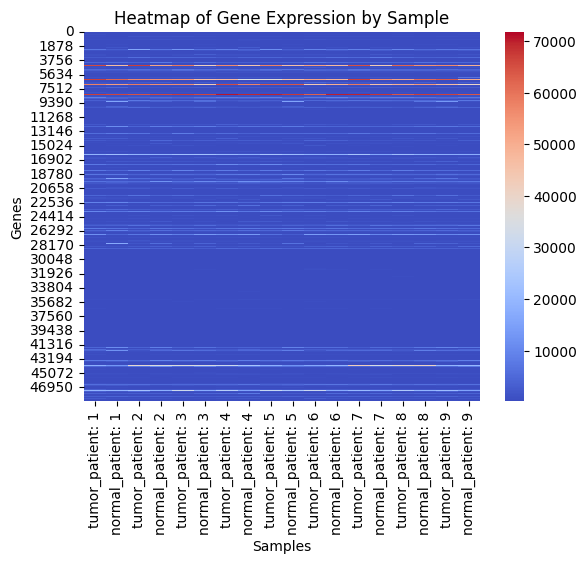

In [16]:
# Heatmap visualiing gene expression by sample
import seaborn as sns
sns.heatmap(gene_expression_df.iloc[:, 1:], cmap='coolwarm', cbar=True)
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.title("Heatmap of Gene Expression by Sample")
plt.show()

In [ ]:
# Cluster map
sns.clustermap(gene_expression_df.iloc[:, 1:])
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.title("Clustermap of Gene Expression by Sample")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


The EDA shows us that tumor is more prevelant among the gene expressions than normal. When adding a new column to the filtered genes dataset Tumors were the main higher expressed samples. The heatmap visualization displays this findings. The heatmap indicates that more genes have low expression levels across all samples. Suggesting that only a small subset of genes may be playing a more significant role in distinguishing tumor and normal samples.

From the further data analysis the symbol that has the highest fold change is REG1B with a fold change of 43.57. This suggests a potential role in tumor progression. The symbol with the lowest fold change is KRT80 with a fold change of 5.09. With further analyis done chromosome 2 is shown to have the highest mean fold change. This highlights it as a potential focal point for understand gene regulation. While chromosmoe 9 has both the highest mean expression and mean control.

The analysis shows that tumor samples consistently have higher gene expression than normal, as confirmed by the heatmap and a the **Higher Expression In** column indicating tumors as more highly expressed. Most genes exhibit low expression, with only a few playing key roles in distinguishing tumor from normal. **REG1B** has the highest fold change (43.57), suggesting a role in tumor progression, while chromosome 2 shows the highest mean fold change, highlighting its importance in gene regulation.